In [ ]:
!pip install tbparse

In [ ]:
import os
import numpy as np
import matplotlib.pyplot as plt
from tbparse import SummaryReader

ROOT_DIR = "/content/drive/MyDrive/NucleiSegmentation/"

In [47]:
def get_training_graphs(dataset, metric, split):
  
  values = {}
  
  for normalized_type in ["normalized", "unnormalized"]:
     vals = []
     for backbone in ["resnet101", "inceptionresnetv2","densenet121"]:
       
       log_dir = os.path.join(ROOT_DIR, "models","logs","-".join([normalized_type,dataset,"UNet",backbone]))
       reader = SummaryReader(log_dir)
       df = reader.scalars
       
       df_metric = df[df['tag']== 'epoch_' + metric]
       split_metric = []
       
       rem = 0 if split == "training" else 1
       for i in range(df_metric.shape[0]):
         if i%2 == rem : split_metric.append(df_metric.iloc[i]['value'])
       
       vals.append(split_metric)
     
     minlen = min([len(arr) for arr in vals])
     trimmed_vals = [arr[:minlen] for arr in vals]
     k = "with-preprocessing" if normalized_type == "normalized" else "without-preprocessing"
     values[k] = np.average(np.array(trimmed_vals), axis = 0)


  # plot values
  plt.figure(figsize=(10, 10))
  for key in values.keys(): plt.plot(range(len(values[key])), values[key], label = key)
  plt.legend()
  plt.savefig(dataset + "_training_" + metric + ".png")
  plt.show()


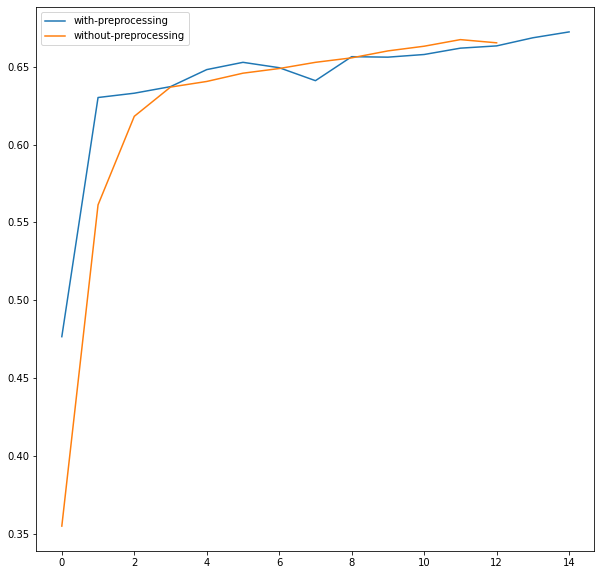

In [48]:
get_training_graphs(dataset = "MOSID", metric = "iou_score", split = "training")